In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import VarianceThreshold

In [30]:
# Charger les données (assurez-vous de mettre à jour le chemin du fichier selon votre environnement)
data_path = 'training.csv'
data = pd.read_csv(data_path, delimiter=';')

In [31]:
# Supprimer la colonne 'AGE'
data = data.drop(columns=['AGE'])

In [32]:
# Préparer les données pour le clustering, en excluant la colonne 'ID' si elle est présente
features = data.drop(columns=['ID'])  # Mettez à jour ou supprimez cette ligne selon la structure de vos données


In [34]:
# Étape 3: Normalisation
scaler = StandardScaler()
features_scaled = scaler.fit_transform(data)

In [35]:
# Étape 4: Élimination des variables peu informatives
threshold = 0.01  # Vous pouvez ajuster ce seuil
sel = VarianceThreshold(threshold)
sel.fit(features_scaled)
features_to_keep = sel.get_support(indices=True)
data_reduced = data.iloc[:, features_to_keep]

In [36]:
# Étape 5: Clustering
k = 3  # Nombre de clusters souhaité
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(data_reduced)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [37]:
# Étape 6: Évaluation avec le score Silhouette
silhouette_avg = silhouette_score(data_reduced, clusters)
print(f"Le score silhouette moyen pour {k} clusters est de : {silhouette_avg}")


Le score silhouette moyen pour 3 clusters est de : 0.4495645349918882


In [38]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_reduced)

In [39]:
# Créer un DataFrame pour les composantes principales avec les clusters
pca_df = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

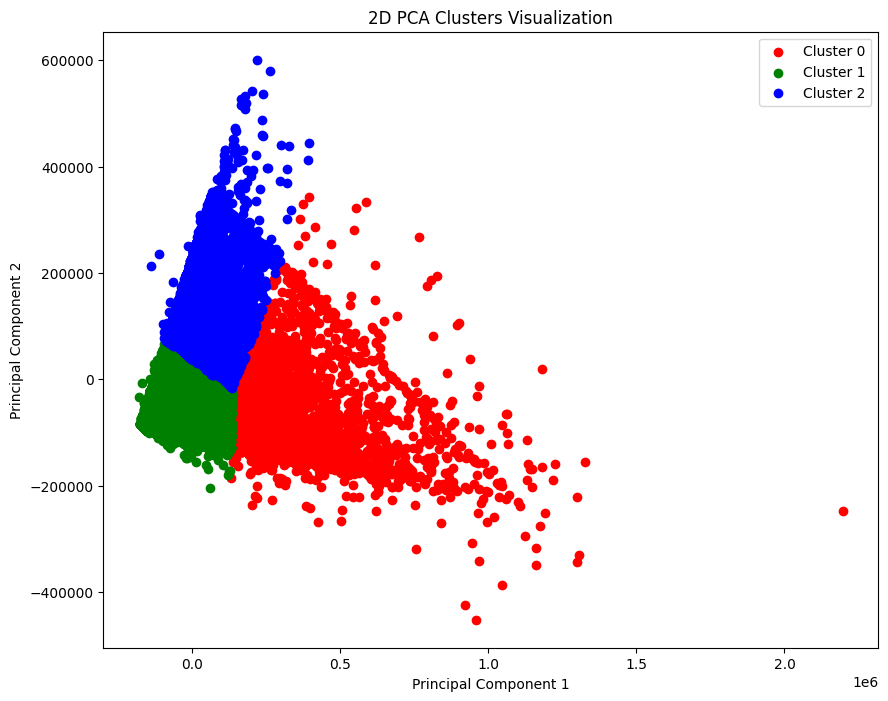

In [40]:
# Étape 7: Visualisation avec PCA
plt.figure(figsize=(10, 8))
colors = ['r', 'g', 'b']
for k in range(0, 3):
    cluster_data = pca_df[pca_df['Cluster'] == k]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], c=colors[k], label=f'Cluster {k}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Clusters Visualization')
plt.legend()
plt.show()

In [41]:
print("Variables conservées après élimination des variables peu informatives :")
print(data.columns[features_to_keep])


Variables conservées après élimination des variables peu informatives :
Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEF'],
      dtype='object')


In [44]:
# Calcul des caractéristiques moyennes pour chaque cluster
cluster_means = data.groupby(clusters).mean()

In [45]:
# Affichage des résultats dans le format demandé
for i, cluster_mean in cluster_means.iterrows():
    print(f"Cluster {i} (Taille: {len(data[clusters == i])} clients)")
    print(f"Profil des clients:")
    print(f"Limites de crédit moyennes: {cluster_mean['LIMIT_BAL']:.2f}")
    print(f"Montant moyen de la facture: {cluster_mean['BILL_AMT1']:.2f}")
    print(f"Paiements moyens: {cluster_mean['PAY_AMT1']:.2f}")
    print()

Cluster 0 (Taille: 2951 clients)
Profil des clients:
Limites de crédit moyennes: 272727.10
Montant moyen de la facture: 204302.79
Paiements moyens: 14309.08

Cluster 1 (Taille: 14523 clients)
Profil des clients:
Limites de crédit moyennes: 82944.43
Montant moyen de la facture: 34475.41
Paiements moyens: 3483.76

Cluster 2 (Taille: 6526 clients)
Profil des clients:
Limites de crédit moyennes: 308585.66
Montant moyen de la facture: 19890.96
Paiements moyens: 6453.65



In [46]:
# Attribuer des personas à chaque cluster en fonction des caractéristiques moyennes
personas = {
    0: "Hauts Revenus",
    1: "Utilisateurs Prudents",
    2: "Jeunes Professionnels"
}

# Afficher les résultats avec les personas attribués
for i, cluster_mean in cluster_means.iterrows():
    print(f"Cluster {i} (Taille: {len(data[clusters == i])} clients)")
    print("Profil des clients:")
    print(f"Limites de crédit moyennes: {cluster_mean['LIMIT_BAL']:.2f}")
    print(f"Montant moyen de la facture: {cluster_mean['BILL_AMT1']:.2f}")
    print(f"Paiements moyens: {cluster_mean['PAY_AMT1']:.2f}")
    print(f"Persona attribué: {personas[i]}")
    print()


Cluster 0 (Taille: 2951 clients)
Profil des clients:
Limites de crédit moyennes: 272727.10
Montant moyen de la facture: 204302.79
Paiements moyens: 14309.08
Persona attribué: Hauts Revenus

Cluster 1 (Taille: 14523 clients)
Profil des clients:
Limites de crédit moyennes: 82944.43
Montant moyen de la facture: 34475.41
Paiements moyens: 3483.76
Persona attribué: Utilisateurs Prudents

Cluster 2 (Taille: 6526 clients)
Profil des clients:
Limites de crédit moyennes: 308585.66
Montant moyen de la facture: 19890.96
Paiements moyens: 6453.65
Persona attribué: Jeunes Professionnels



In [50]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA



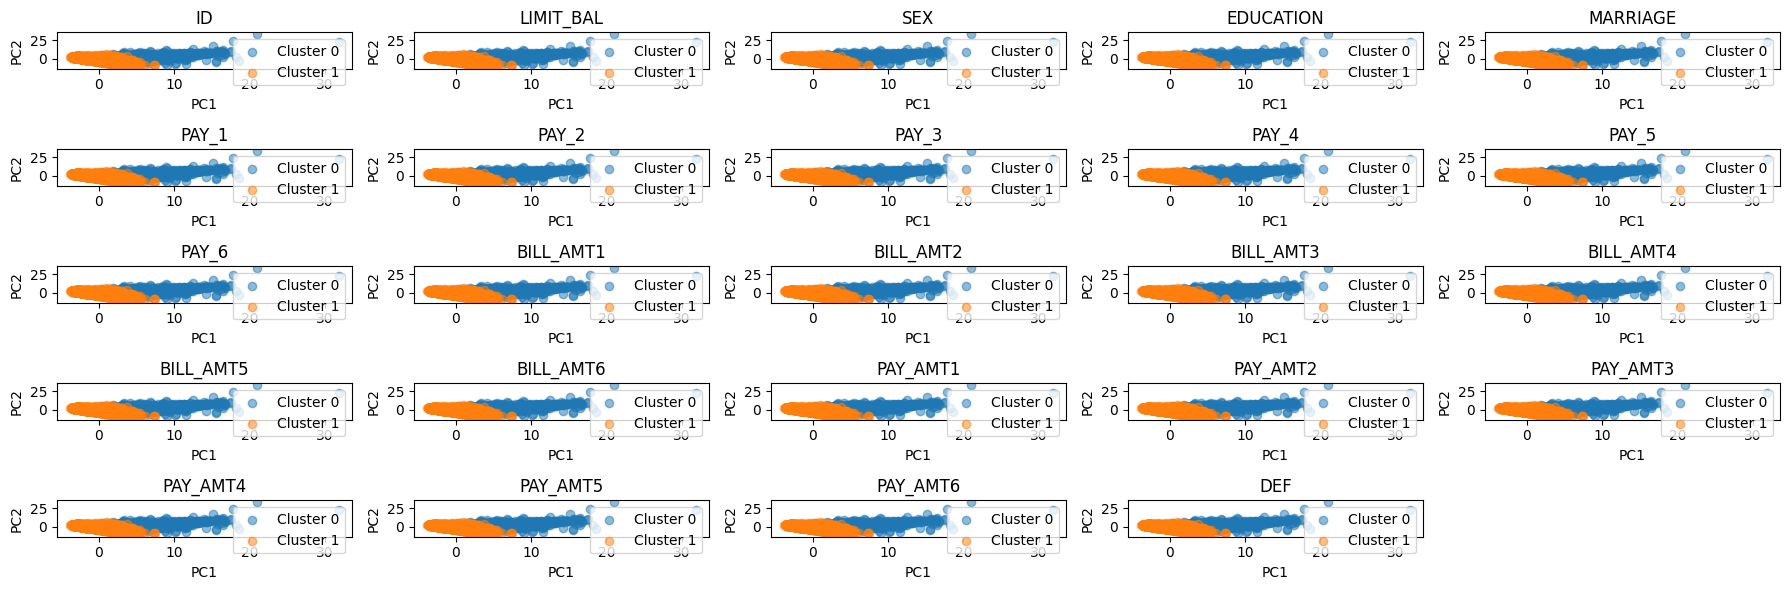

In [54]:


# Réduction de dimension avec PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features_scaled)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

# Calcul du nombre de lignes et de colonnes en fonction du nombre total de variables
num_variables = len(data.columns)
num_rows = (num_variables + 4) // 5  # Arrondi supérieur pour s'assurer que nous avons assez de lignes
num_cols = min(num_variables, 5)

# Création de la figure
plt.figure(figsize=(18, 6))

# Boucle sur chaque variable
for i, column in enumerate(data.columns):
    plt.subplot(num_rows, num_cols, i+1)
    for cluster_id in range(k):
        plt.scatter(principalDf.loc[clusters == cluster_id, 'PC1'],
                    principalDf.loc[clusters == cluster_id, 'PC2'],
                    label=f'Cluster {cluster_id}', alpha=0.5)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(column)
    plt.legend()

plt.tight_layout()
plt.show()
